In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/dimpu/Downloads/archive (8)/dirty_cafe_sales.csv")

In [4]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [6]:
print(df.shape)
print(df.head())
print(df.info())
print(df.describe(include="all"))

(10000, 8)
  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non

In [7]:
df.isnull().mean() * 100

Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     1.59
dtype: float64

In [8]:
df.nunique()

Transaction ID      10000
Item                   10
Quantity                7
Price Per Unit          8
Total Spent            19
Payment Method          5
Location                4
Transaction Date      367
dtype: int64

In [9]:
df = df.replace({"NaN": np.nan,"nan": np.nan, "UNKNOWN": np.nan, "ERROR": np.nan})

In [10]:
# Numeric fields
num_cols = ["Quantity", "Price Per Unit", "Total Spent"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Date fields
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

In [11]:
valid_rows = df["Quantity"].notna() & df["Price Per Unit"].notna()
df.loc[valid_rows, "Total Spent"] = (
    df.loc[valid_rows, "Quantity"] * df.loc[valid_rows, "Price Per Unit"]
)

In [12]:
categorical_cols = ["Item", "Payment Method", "Location"]
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")


In [13]:
df.drop_duplicates(subset=["Transaction ID"], inplace=True)


In [14]:
df["Year"] = df["Transaction Date"].dt.year
df["Month"] = df["Transaction Date"].dt.month
df["Day"] = df["Transaction Date"].dt.day
df["DayOfWeek"] = df["Transaction Date"].dt.dayofweek
df["IsWeekend"] = df["DayOfWeek"].isin([5, 6]).astype(int)

# Digital payment flag
df["IsDigitalPayment"] = df["Payment Method"].isin(["Digital Wallet", "Credit Card"]).astype(int)


In [15]:
Q1 = df["Total Spent"].quantile(0.25)
Q3 = df["Total Spent"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df["Outlier_TotalSpent"] = ((df["Total Spent"] < lower) |
                            (df["Total Spent"] > upper)).astype(int)

print(df["Outlier_TotalSpent"].value_counts())


Outlier_TotalSpent
0    9732
1     268
Name: count, dtype: int64


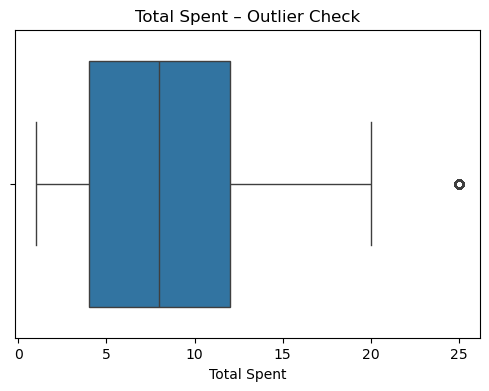

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Total Spent"])
plt.title("Total Spent – Outlier Check")
plt.show()


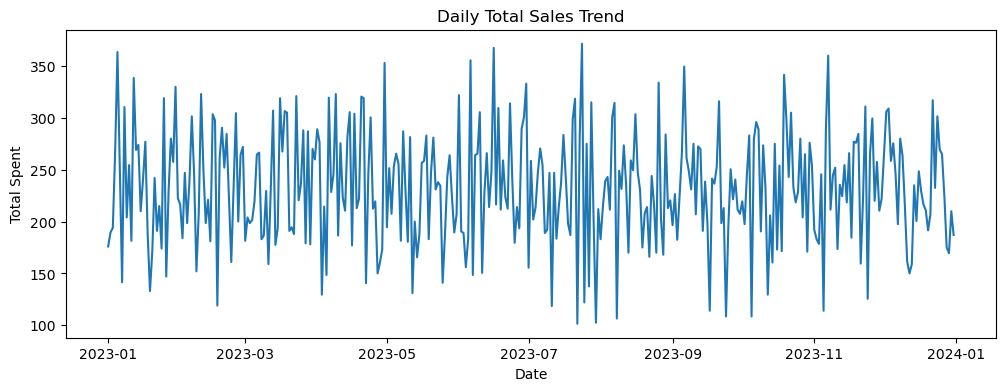

In [17]:
#Total sales
daily = df.groupby("Transaction Date")["Total Spent"].sum()

plt.figure(figsize=(12,4))
plt.plot(daily.index, daily.values)
plt.title("Daily Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Spent")
plt.show()


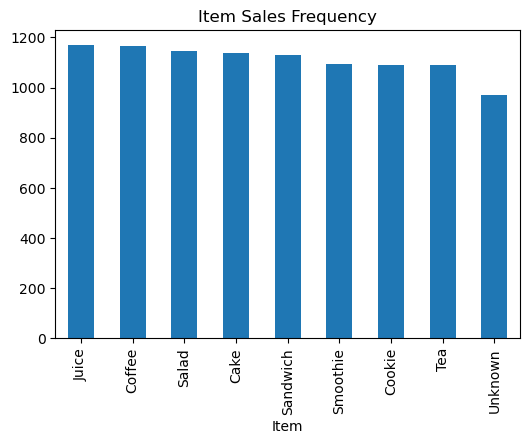

In [18]:
#Items distribution
plt.figure(figsize=(6,4))
df["Item"].value_counts().plot(kind="bar")
plt.title("Item Sales Frequency")
plt.show()


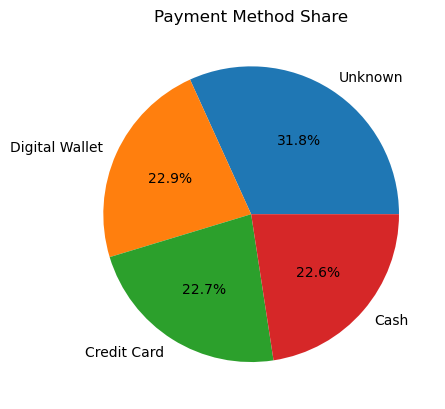

In [19]:
#Payment method usage
df["Payment Method"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Payment Method Share")
plt.ylabel("")
plt.show()


In [20]:
df_corr = pd.get_dummies(df, drop_first=True)


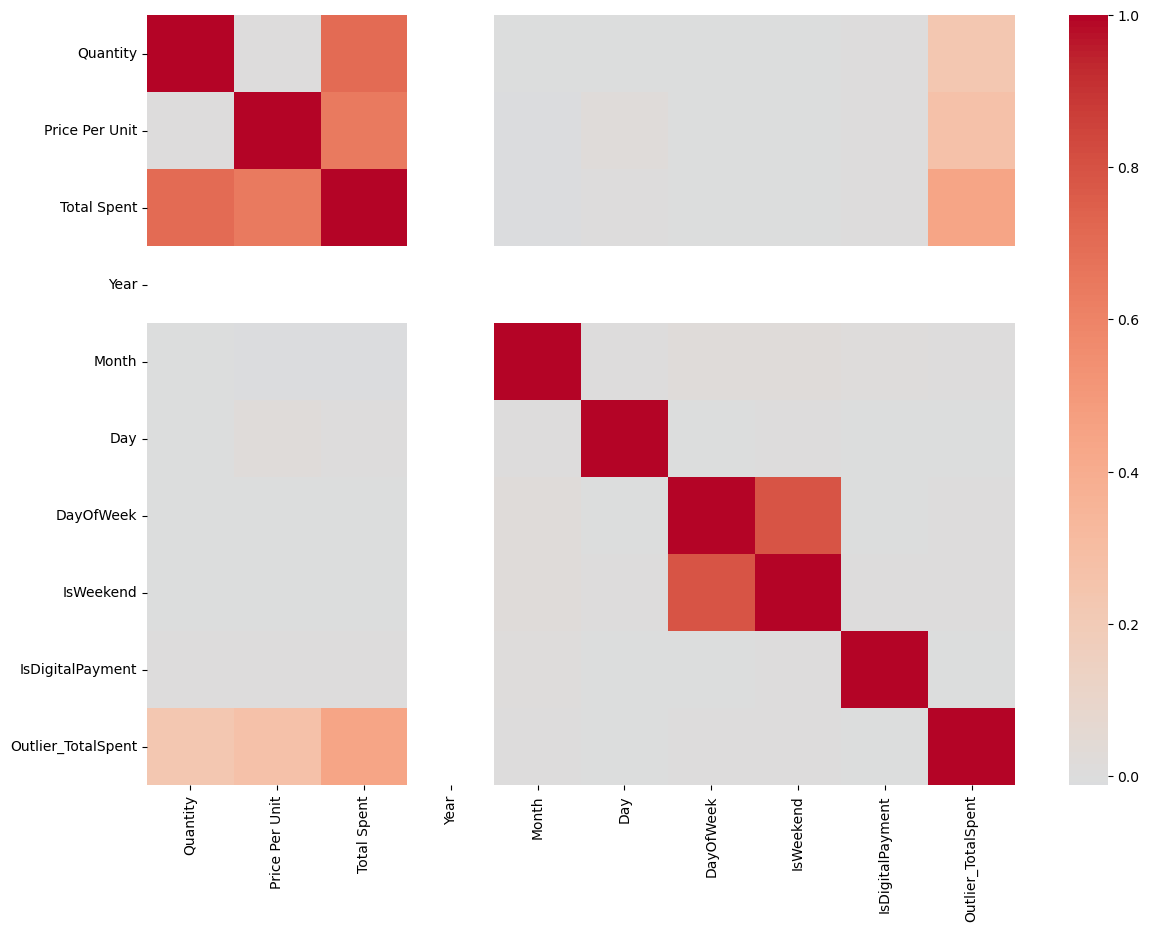

In [27]:
df_numeric = df.select_dtypes(include='number')

# 2. Compute correlation
corr = df_numeric.corr()

# 3. Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.show()

In [25]:
print("Top-selling items:")
print(df.groupby("Item")["Total Spent"].sum().sort_values(ascending=False))

print("\nMost used payment method:")
print(df["Payment Method"].value_counts())

print("\nSales by location:")
print(df.groupby("Location")["Total Spent"].sum())

print("\nWeekend vs Weekday spending:")
print(df.groupby("IsWeekend")["Total Spent"].mean())


Top-selling items:
Item
Salad       17320.0
Sandwich    13664.0
Smoothie    13320.0
Juice       10509.0
Cake        10395.0
Unknown      8507.5
Coffee       7062.0
Tea          4951.5
Cookie       3223.0
Name: Total Spent, dtype: float64

Most used payment method:
Payment Method
Unknown           3178
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64

Sales by location:
Location
In-store    27127.0
Takeaway    26487.5
Unknown     35337.5
Name: Total Spent, dtype: float64

Weekend vs Weekday spending:
IsWeekend
0    8.941917
1    8.901796
Name: Total Spent, dtype: float64


In [26]:
df.to_csv("clean_transactions.csv", index=False)
